In [12]:
class Image:
    def __init__(self, data):
        
        if not isinstance(data, np.ndarray):
            raise TypeError("Image data must be a NumPy array")
            
        self.data = data

class BinaryImage(Image):
    def __init__(self, data):
        if not np.all(np.isin(data, [0, 255])):
            raise ValueError("Binary image data must contain only 0 or 255")
        super().__init__(data)

class MonochromeImage(Image):
    def __init__(self, data):
        if not np.all((data >= 0) & (data <= 255)):
            raise ValueError("Monochrome image data must be in range 0-255")
        super().__init__(data)

class ColorImage(Image):
    def __init__(self, data):
        if not data.ndim == 3 or not data.shape[2] == 3:
            raise ValueError("Color image data must be a 3-dimensional array with shape (height, width, 3)")
        if not np.all((data >= 0) & (data <= 255)):
            raise ValueError("Color image data must be in range 0-255")
        super().__init__(data)


In [29]:
class ImageConverter:
    @staticmethod
    # Статистическая цветокоррекция
    def monochrome_to_monochrome(image: MonochromeImage):
        return image 

    @staticmethod
    # Полноцветное-полноцветное (например, поканальная статистическая цветокоррекция)
    def color_to_color(image: ColorImage):
        return image 

    @staticmethod
    def binary_to_binary(image: BinaryImage):
        return image  

    @staticmethod
    # Вычисление оттенка серого пикселя
    def color_to_monochrome(image: ColorImage):
        
        if not isinstance(image, ColorImage):
            raise TypeError("Input image must be a ColorImage")
        gray_data = np.mean(image.data, axis=2).astype(np.uint8)
        return MonochromeImage(gray_data)

    @staticmethod
    # Применение палитры
    def monochrome_to_color(image: MonochromeImage, palette):
        if not isinstance(image, MonochromeImage):
            raise TypeError("Input image must be a MonochromeImage")
        if not isinstance(palette, np.ndarray):
            raise TypeError("Palette must be a NumPy array")
        if not palette.ndim == 2 and not palette.shape[1] == 3:
            raise ValueError("Palette must be a 2-dimensional array with shape (num_colors, 3)")
        if not np.all((palette >= 0) & (palette <= 255)):
            raise ValueError("Palette values must be in range 0-255")

        print(f"Shape of image.data: {image.data.shape}")  # Проверка формы

        color_data = np.zeros((*image.data.shape, 3), dtype=np.uint8)
        for i in range(len(palette)):
            color_data[image.data == i, :] = palette[i]
        return ColorImage(color_data)

    @staticmethod
    def monochrome_to_binary(image: MonochromeImage, threshold=128):
        if not isinstance(image, MonochromeImage):
            raise TypeError("Input image must be a MonochromeImage")
        _, binary_data = cv2.threshold(image.data, threshold, 255, cv2.THRESH_BINARY)  # Используем cv2.threshold
        return BinaryImage(binary_data)

    @staticmethod
    def binary_to_monochrome(image: BinaryImage):
        distance_transform = cv2.distanceTransform(image.data, cv2.DIST_L2, 5)  # Используем cv2.distanceTransform
        distance_transform = (distance_transform / np.max(distance_transform) * 255).astype(np.uint8)
        return MonochromeImage(distance_transform)

    @staticmethod
    def color_to_binary(image: ColorImage):
        monochrome_image = ImageConverter.color_to_monochrome(image)
        return ImageConverter.monochrome_to_binary(monochrome_image)

    @staticmethod
    def binary_to_color(image: BinaryImage):
        monochrome_image = ImageConverter.binary_to_monochrome(image)
        palette = np.array([[0, 0, 0], [255, 255, 255]], dtype=np.uint8) 
        return ImageConverter.monochrome_to_color(monochrome_image, palette)

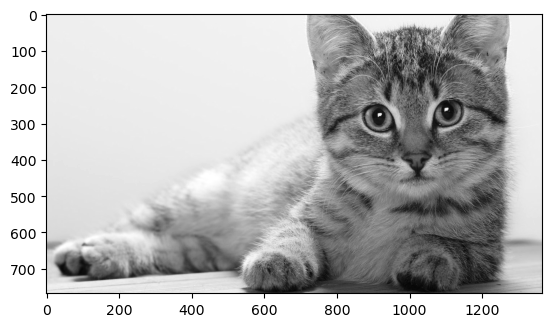

Shape of image.data: (574, 900)


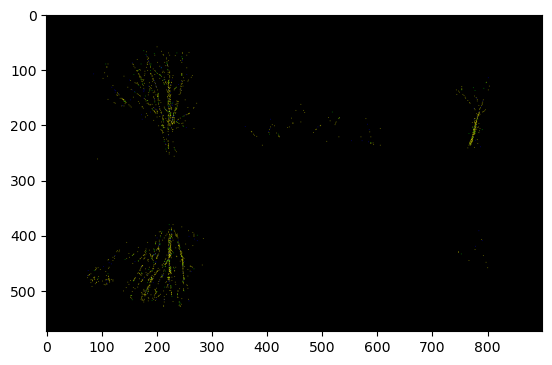

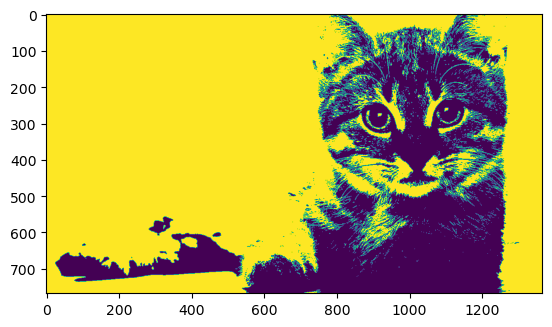

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
binary_data = np.array([[0, 255], [255, 0]], dtype=np.uint8)
monochrome_data = cv2.imread('./mono.jpg', cv2.IMREAD_GRAYSCALE)  
color_data = cv2.imread("cat.jpg")


binary_image = BinaryImage(binary_data)
monochrome_image = MonochromeImage(monochrome_data)
color_image = ColorImage(color_data)

# Преобразования

#color_to_monochrome
converted_monochrome = ImageConverter.color_to_monochrome(color_image)
plt.imshow(converted_monochrome.data, cmap="gray")
plt.show()

#monochrome_to_color
palette = np.array([
    [255, 255, 0],  # Желтый
    [0, 255, 0],   # Зеленый
    [0, 0, 255]    # Синий
], dtype=np.uint8)
converted_color = ImageConverter.monochrome_to_color(monochrome_image, palette)
plt.imshow(converted_color.data)
plt.show()

#color to binary
converted_binary = ImageConverter.color_to_binary(color_image)
plt.imshow(converted_binary.data)
plt.show()



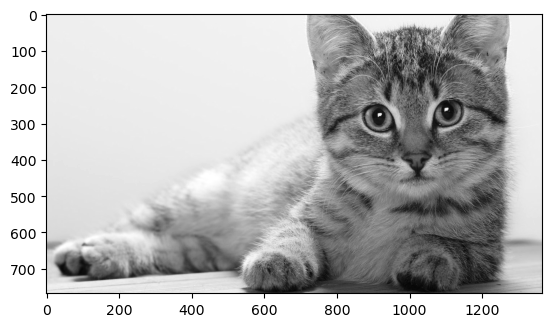

Shape of image.data: (574, 900)


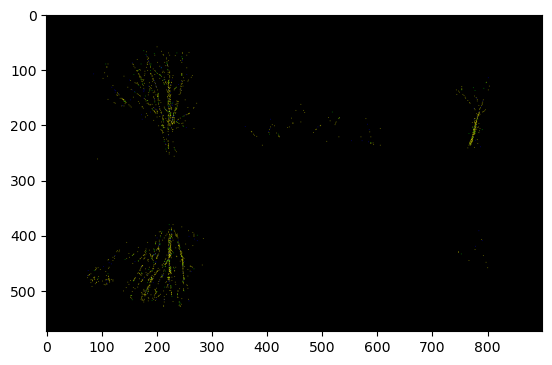

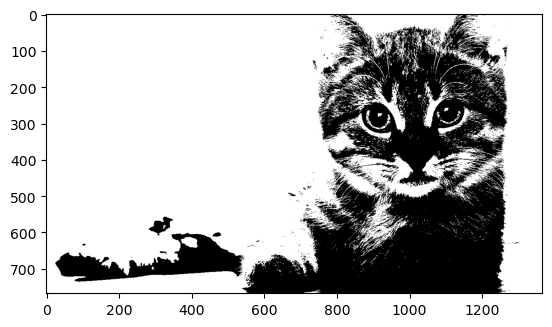

Shape of image.data: (768, 1366)


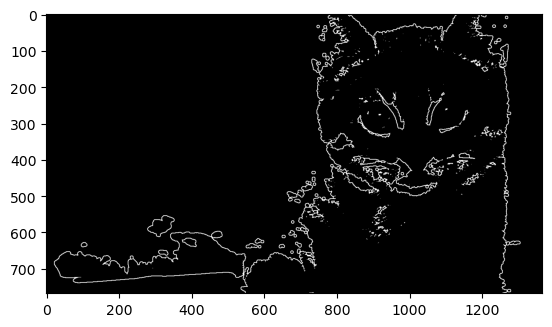

In [34]:
# Создание примеров изображений
binary_data = np.array([[0, 255], [255, 0]], dtype=np.uint8)
monochrome_data = cv2.imread('./mono.jpg', cv2.IMREAD_GRAYSCALE)  # Загружаем как монохромное
color_data = cv2.imread("cat.jpg")


binary_image = BinaryImage(binary_data)
monochrome_image = MonochromeImage(monochrome_data)
color_image = ColorImage(color_data)

# Преобразования

#color_to_monochrome
converted_monochrome = ImageConverter.color_to_monochrome(color_image)
plt.imshow(converted_monochrome.data, cmap="gray")
plt.show()

#monochrome_to_color
palette = np.array([
    [255, 255, 0],  # Желтый
    [0, 255, 0],   # Зеленый
    [0, 0, 255]    # Синий
], dtype=np.uint8)
converted_color = ImageConverter.monochrome_to_color(monochrome_image, palette)
plt.imshow(converted_color.data)
plt.show()

#color to binary
converted_binary = ImageConverter.color_to_binary(color_image)
plt.imshow(converted_binary.data, cmap="gray")
plt.show()


#binary to color
converted_color = ImageConverter.binary_to_color(converted_binary)
plt.imshow(converted_color.data)
plt.show()
